# Лаба 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

In [4]:
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['figure.dpi'] = 100

# Явная схема

# Стационарный случай

In [5]:
L = 0.1 # wall sickness [m]
n = 10
T0 = 0 # C
T1s = 40 
T2s = 20
dx = L / n
alpha = 0.0001
t_final = 60
dt = 0.1

In [6]:
x = np.linspace(dx/2, L - dx/2, n)

In [7]:
T = np.ones(n) * T0
dTdt = np.empty(n)

In [8]:
t = np.arange(0, t_final, dt)

# Решаем уравнение теплопроводности:
### *температура на левом краю – 40 градусов*
### *температура на правом краю – 20 градусов*

Text(0, 0.5, 'Temperature (C)')

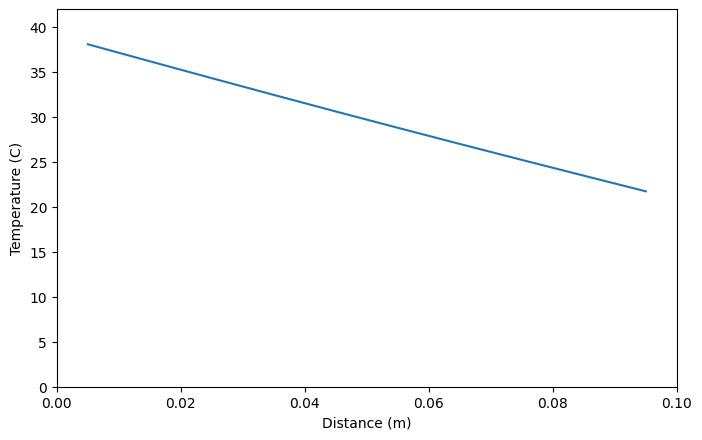

In [9]:
for j in range(1,len(t)):
    for i in range(1, n - 1):
        dTdt[i] = alpha * (-(T[i] - T[i - 1])/dx**2 + (T[i+1]-T[i])/dx**2)
    dTdt[0] = alpha * (-(T[0] - T1s)/dx**2 + (T[1] - T[0])/dx**2)
    dTdt[n-1] = alpha * (-(T[n-1]-T[n-2])/dx**2 + (T2s - T[n-1])/dx**2)
    T = T + dTdt*dt
plt.plot(x,T)
plt.axis([0, L, 0, max(T1s, T2s) + T1s//T2s])
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')

# Нестационарный случай

In [10]:
L = 0.1 # wall sickness [m]
n = 10
T0 = 0 # C
T1s = 0 
T2s = 20
dx = L / n
alpha = 0.0001
t_final = 60
dt = 0.1

In [11]:
x = np.linspace(dx/2, L - dx/2, n)

In [12]:
T = np.ones(n) * T0
dTdt = np.empty(n)

In [13]:
t = np.arange(0, t_final, dt)

# Решаем уравнение теплопроводности:
### *температура на левом краю – 0 градусов, но она растет со временем линейно*
### *температура на правом краю – 20 градусов*

Text(0, 0.5, 'Temperature (C)')

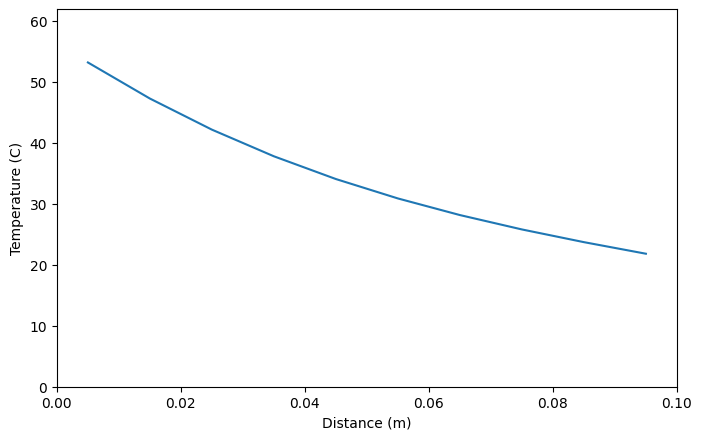

In [14]:
for j in range(1, len(t)):
    for i in range(1, n - 1):
        dTdt[i] = alpha * (-(T[i] - T[i - 1])/dx**2 + (T[i+1]-T[i])/dx**2)
    T1s += dt
    dTdt[0] = alpha * (-(T[0] - T1s)/dx**2 + (T[1] - T[0])/dx**2)
    dTdt[n-1] = alpha * (-(T[n-1]-T[n-2])/dx**2 + (T2s - T[n-1])/dx**2)
    T = T + dTdt*dt
plt.plot(x,T)
plt.axis([0, L, 0, max(T1s, T2s) + T1s//T2s])
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (C)')

# Неявная схема

In [61]:
h = 0.1
dt = 0.1
sigma = 1000
u_x0 = np.sin(np.arange(0, 2 * np.pi, h) * 2 * np.pi)
u_xN = np.cos(np.arange(0, 2 * np.pi, h) * 2 * np.pi)
u_x0 = np.linspace(0, 1000, 40)
u_xN = np.ones(40) * 20
u_t0 = np.ones(sigma)

In [62]:
def solve_implicit():
    N = u_t0.size - 1
    M = u_x0.size - 1
    u = np.zeros((M+1, N+1))
    u[0] = u_t0
    for n in range(M):
        alpha = np.zeros(N)
        beta = np.zeros(N)
        beta[0] = u_x0[n+1]
        for j in range(1, N):
            a = -sigma * dt / h**2
            b = 1 + 2 * sigma * dt / h**2
            c = a
            s = u[n, j]
            alpha[j] = - a / (b + c * alpha[j-1])
            beta[j] = (s - c * beta[j - 1]) / (b + c * alpha[j - 1])
        u[n+1, N] = u_xN[n + 1]
        for j in range(N, 0, -1):
            u[n+1, j-1] = alpha[j - 1] * u[n + 1, j] + beta[j - 1]
    return u

In [63]:
u = solve_implicit()

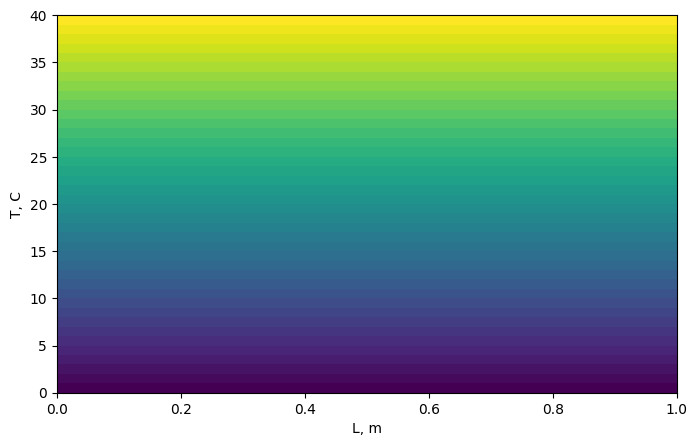

In [67]:
fg, ax = plt.subplots()
ax.set_xlabel("L, m")
ax.set_ylabel("T, C")
ax.set_xlim([0,1])
ax.pcolormesh(u)